<a href="https://colab.research.google.com/github/adnanfathoni88/ML-CNN-BATIK/blob/main/CNN_BATIK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import library

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving testing.zip to testing.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("testing.zip", 'r') as zip_ref: # file zip tujuan
    zip_ref.extractall("batik_dataset") # lokasi ekstrak

# Cek isi direktori
os.listdir("batik_dataset")

['testing']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, # rotasi
    horizontal_flip=True, # flip horizontal
    vertical_flip=True, # flip vertikal
    validation_split=0.2  # 80% training, 20% validation
)

train_dir = 'batik_dataset/testing' # ambil data

# Data Augmentasi dan Preprocessing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 157 images belonging to 20 classes.
Found 37 images belonging to 20 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# c: Model CNN, NIM ganjil = 5 conv layers
model.add(Conv2D(256, (3, 3), activation='relu'))  # Layer ke-5
model.add(MaxPooling2D(pool_size=(2, 2)))

# d: Softmax di output (multi class)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# f: Parameter lainnya bebas
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# e: Training 50 epoch (80% training, 20% validasi)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5506 - loss: 1.3970 - val_accuracy: 0.1622 - val_loss: 6.8767
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6556 - loss: 1.0540 - val_accuracy: 0.1351 - val_loss: 6.3211
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6242 - loss: 1.1396 - val_accuracy: 0.1081 - val_loss: 6.1130
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6304 - loss: 1.0543 - val_accuracy: 0.1351 - val_loss: 6.8747
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7574 - loss: 0.8654 - val_accuracy: 0.1892 - val_loss: 6.7316
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8112 - loss: 0.7372 - val_accuracy: 0.1622 - val_loss: 7.9020
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8001 - loss: 0.6884 - val_accuracy: 0.1622 - val_loss: 7.6898
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7774 - loss: 0.6513 - val_accuracy: 0.1892 - val_loss: 8.0431
Epoch 9/50
5/

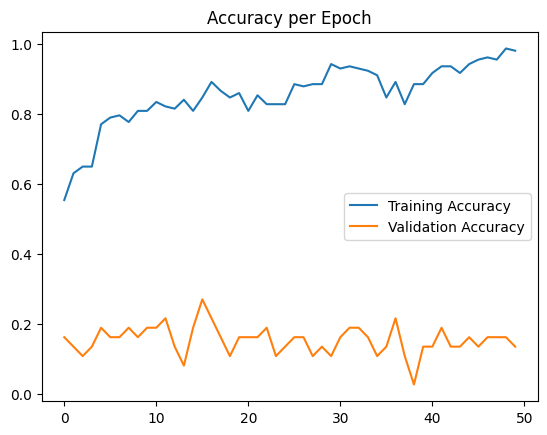

In [ ]:
#  g: Grafik akurasi dan loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()

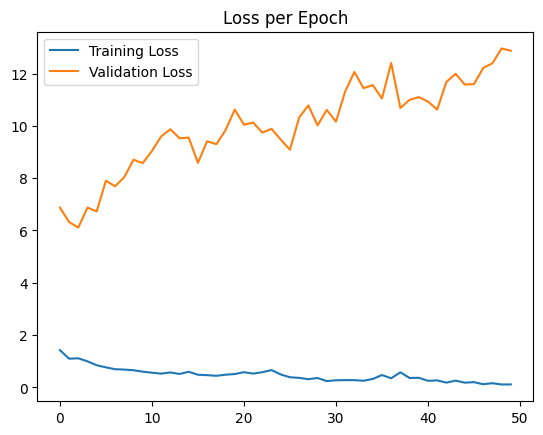

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'batik_dataset/testing',
    target_size=(128, 128),   # Gunakan ukuran target yang sama
    batch_size=32,            # Gunakan ukuran batch yang sama
    class_mode='categorical', # Gunakan mode kelas yang sama
    shuffle=False
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Akurasi model di test set sekitar 43.8%, masih bisa ditingkatkan dengan tambah data latih

Found 194 images belonging to 20 classes.
Test Loss: 2.712003469467163
Test Accuracy: 0.438144326210022


In [ ]:
#  i: Analisis hasil modelling
print("Akurasi terakhir training:", history.history['accuracy'][-1])
print("Akurasi terakhir validasi:", history.history['val_accuracy'][-1])

# Akurasi training jauh lebih tinggi dibanding validasi.
# Artinya model belajar terlalu baik pada data latih, tapi gagal generalisasi ke data baru.

Akurasi terakhir training: 0.5923566818237305
Akurasi terakhir validasi: 0.13513512909412384


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
 File: 47.jpg
Prediksi: batik-pekalongan |  Label asli: batik-pekalongan



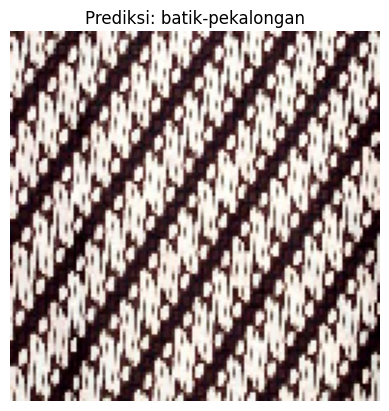

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
 File: 48.jpg
Prediksi: batik-priangan |  Label asli: batik-priangan



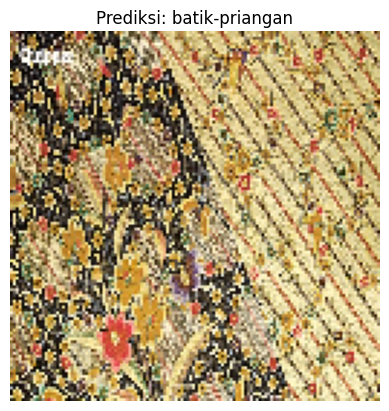

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
 File: 45.jpg
Prediksi: batik-keraton |  Label asli: batik-keraton



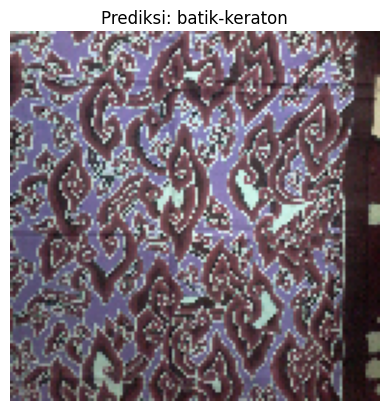

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import random
import os
import matplotlib.pyplot as plt


# Ambil label map dari train_generator
label_map = {v: k for k, v in train_generator.class_indices.items()}

# Ambil 3 gambar acak dari folder testing
test_classes = os.listdir('batik_dataset/testing')

for _ in range(3):
    cls = random.choice(test_classes)
    img_file = random.choice(os.listdir(f'batik_dataset/testing/{cls}'))
    path = f'batik_dataset/testing/{cls}/{img_file}'

    # Load dan preprocess gambar
    img = image.load_img(path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi
    pred = model.predict(img_array)
    pred_class = np.argmax(pred)

    print(f" File: {img_file}")
    print(f"Prediksi: {label_map[pred_class]} |  Label asli: {cls}\n")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {label_map[pred_class]}")
    plt.show()
